In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.feature_selection import SelectKBest,chi2

In [2]:
df = pd.read_csv('/content/breast_disease.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.shape

(569, 33)

In [4]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df = df.drop(['id','Unnamed: 32'],axis=1)

In [6]:
df['diagnosis'] = pd.get_dummies(df['diagnosis'],drop_first=True)
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [7]:
# benign-->0
# malignant-->1

y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: uint8

In [8]:
select = SelectKBest(chi2,30)
select.fit(x,y)
select.scores_

array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
       1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
       2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
       2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
       1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
       4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
       3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
       1.29886140e+00, 2.31522407e-01])

In [9]:
scores = pd.DataFrame(select.scores_,columns=['scores'])
columns = pd.DataFrame(x.columns,columns=['columns'])
scores['columns'] = columns
scores

,scores,columns
0,266.104917,radius_mean
1,93.897508,texture_mean
2,2011.102864,perimeter_mean
3,53991.655924,area_mean
4,0.149899,smoothness_mean
5,5.403075,compactness_mean
6,19.712354,concavity_mean
7,10.544035,concave points_mean
8,0.257380,symmetry_mean
9,0.000074,fractal_dimension_mean


In [10]:
largest = scores.nlargest(10,'scores')
largest

,scores,columns
23,112598.431564,area_worst
3,53991.655924,area_mean
13,8758.504705,area_se
22,3665.035416,perimeter_worst
2,2011.102864,perimeter_mean
20,491.689157,radius_worst
0,266.104917,radius_mean
12,250.571896,perimeter_se
21,174.449400,texture_worst
1,93.897508,texture_mean


In [11]:
final = list(largest['columns'].to_numpy())
final

['area_worst',
 'area_mean',
 'area_se',
 'perimeter_worst',
 'perimeter_mean',
 'radius_worst',
 'radius_mean',
 'perimeter_se',
 'texture_worst',
 'texture_mean']

In [12]:
x = x[final]

In [13]:
## feature scaling
scaler = StandardScaler()
scaling = scaler.fit_transform(x)
scaling

array([[ 2.00123749,  0.9843749 ,  2.48757756, ...,  2.83303087,
        -1.35929347, -2.07333501],
       [ 1.89048899,  1.90870825,  0.74240195, ...,  0.26332697,
        -0.36920322, -0.35363241],
       [ 1.45628455,  1.55888363,  1.18133606, ...,  0.8509283 ,
        -0.02397438,  0.45618695],
       ...,
       [ 0.42790561,  0.57795264,  0.1806983 , ...,  0.27669279,
         1.37485378,  2.0455738 ],
       [ 1.65317077,  1.73521799,  1.0095027 , ...,  1.43852964,
         2.23792588,  2.33645719],
       [-1.07581292, -1.34778924, -0.46615196, ..., -0.15744905,
         0.76418957,  1.22179204]])

In [14]:
x = pd.DataFrame(scaling,columns=x.columns)
x.head()

,area_worst,area_mean,area_se,perimeter_worst,perimeter_mean,radius_worst,radius_mean,perimeter_se,texture_worst,texture_mean
0,2.001237,0.984375,2.487578,2.303601,1.269934,1.886690,1.097064,2.833031,-1.359293,-2.073335
1,1.890489,1.908708,0.742402,1.535126,1.685955,1.805927,1.829821,0.263327,-0.369203,-0.353632
2,1.456285,1.558884,1.181336,1.347475,1.566503,1.511870,1.579888,0.850928,-0.023974,0.456187
3,-0.550021,-0.764464,-0.288378,-0.249939,-0.592687,-0.281464,-0.768909,0.286593,0.133984,0.253732
4,1.220724,1.826229,1.190357,1.338539,1.776573,1.298575,1.750297,1.273189,-1.466770,-1.151816


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


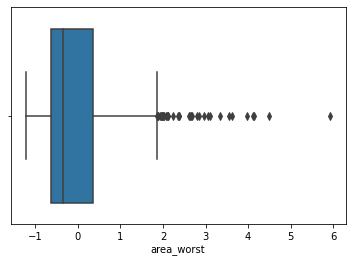

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


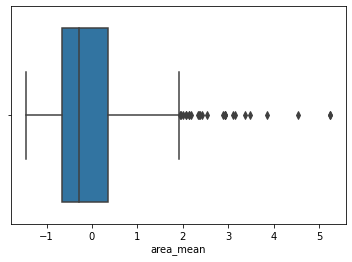

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


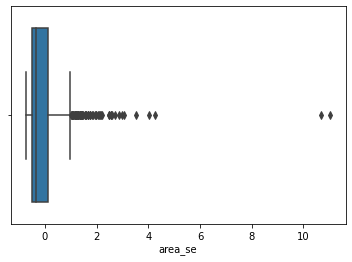

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


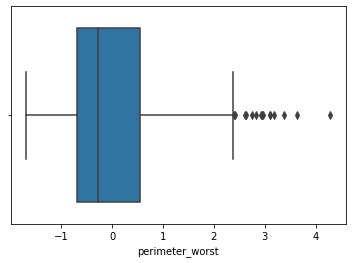

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


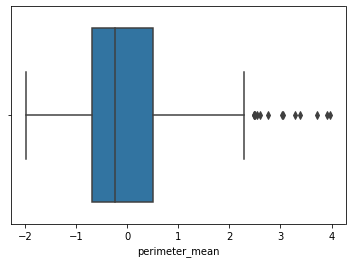

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


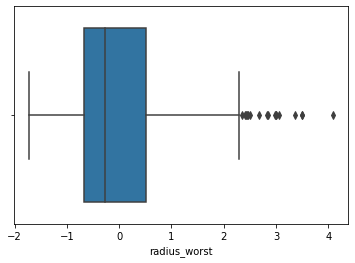

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


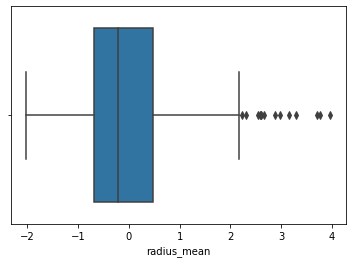

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


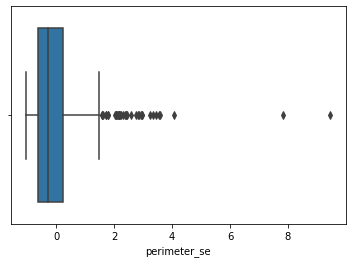

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


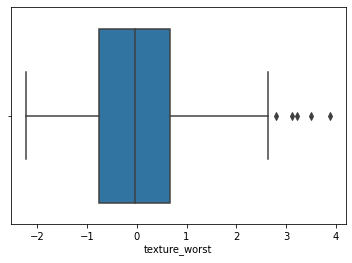

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


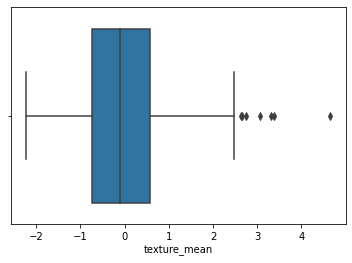

In [15]:
for i in x.columns:
  sns.boxplot(x[i])
  plt.show()

In [16]:
# handling outliers

for i in x.columns:
  q1 = np.percentile(x[i],25)
  q3 = np.percentile(x[i],75)
  iqr = q3-q1
  upper_bound = q3+(1.5*iqr)
  lower_bound = q1-(1.5*iqr)

  x[i] = np.where(x[i]>upper_bound,upper_bound,x[i])
  x[i] = np.where(x[i]<lower_bound,lower_bound,x[i])
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


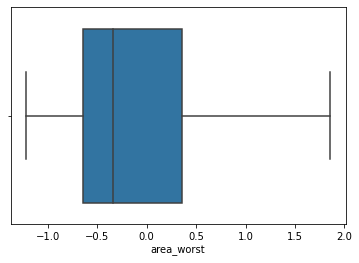

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


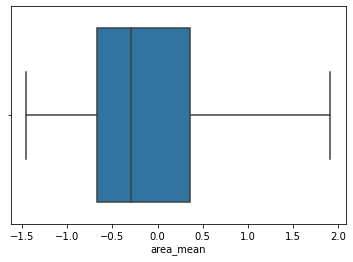

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


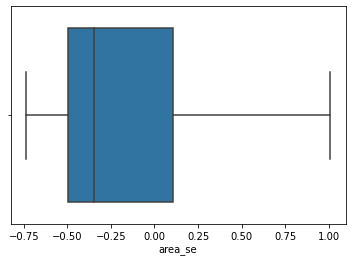

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


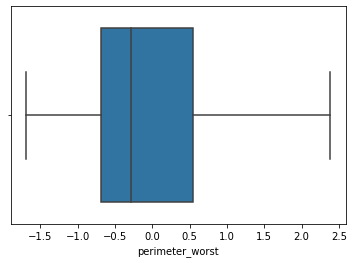

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


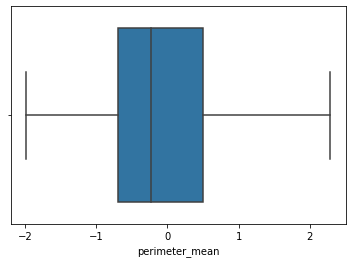

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


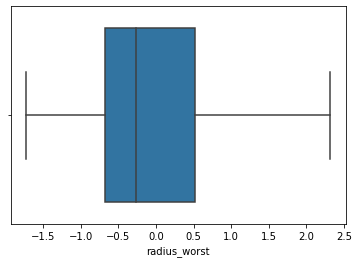

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


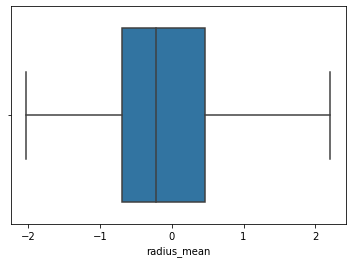

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


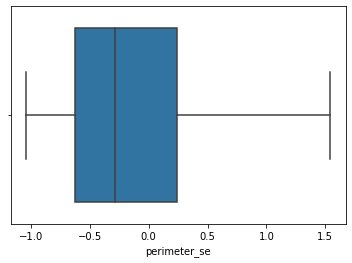

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


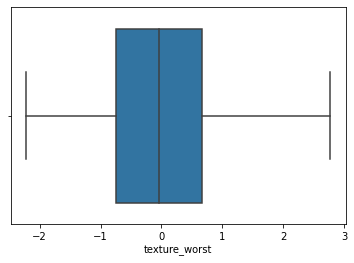

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


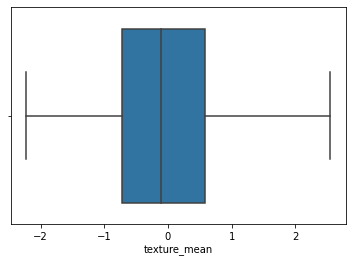

In [17]:
for i in x.columns:
  sns.boxplot(x[i])
  plt.show()

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state=42)

In [19]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = KNeighborsClassifier()
model4 = SVC()
model5 = XGBClassifier()

# KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#                      metric_params=None, n_jobs=None, n_neighbors=16, p=2,
#                      weights='uniform')

In [20]:
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred))

0.9649122807017544


In [21]:
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred))

0.9649122807017544


In [22]:
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
print(accuracy_score(y_test,pred))

0.9736842105263158


In [23]:
model4.fit(x_train,y_train)
pred = model4.predict(x_test)
print(accuracy_score(y_test,pred))

0.956140350877193


In [24]:
model5.fit(x_train,y_train)
pred = model5.predict(x_test)
print(accuracy_score(y_test,pred))

0.9473684210526315


In [25]:

cv = KFold(n_splits=5)

# logistic
params1={
    'penalty':['l1','l2'],
    'C':[1.0]
}

#random forest
params2={
    'n_estimators':[120,300,500,800,1200],
    'max_depth':[5,8,15,25,30,None],
    'min_samples_split':[1,2,5,10,15,100],
    'min_samples_leaf':[1,2,5,10],
    'max_features':['log2','sqrt',None]
}

# knn
params3={
        'n_neighbors':[2,3,4,5,6,78,16],
    'p':[2,3]
    }

# svm
params4={
      'C':[0.001,0.01,1.0],
  'gamma':['auto','scale'],
  'class_weight':['balanced',None]
}


# xgboost
params5={
    'eta':[0.01,0.015,0.025,0.05,0.1],
    'gamma':[0.05,1,0.3,0.5,0.7,0],
    'max_depth':[3,5,7,9,12,15,17],
    'min_child_weight':[1,3,5,7],
    'subsample':[0.6,0.7,0.8,0.9,1],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1],
    'reg_lambda':[0.01,1.0,0.1,1],
    'reg_alpha':[0,0.1,0.5,1.0]
}


In [26]:
h1 = GridSearchCV(model1,params1,scoring='accuracy')
h2 = GridSearchCV(model2,params2,scoring='accuracy')
h3 = GridSearchCV(model3,params3,scoring='accuracy')
h4 = GridSearchCV(model4,params4,scoring='accuracy')
h5 = GridSearchCV(model5,params5,scoring='accuracy')

In [27]:
# logistic
h1.fit(x_train,y_train)
print(h1.best_score_)

0.9406593406593406


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


In [28]:
# knn
h3.fit(x_train,y_train)
print(h3.best_score_)

0.9384615384615385


In [29]:
# svm
h4.fit(x_train,y_train)
print(h4.best_score_)

0.9406593406593406


In [30]:
y_pred = h1.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9649122807017544


In [31]:
y_pred = h3.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.9473684210526315


In [32]:
y_pred = h4.predict(x_test)
print(accuracy_score(y_pred,y_test))

0.956140350877193


In [33]:
h1.predict([[2.001237,0.984375,2.487578,2.303601,1.269934,1.886690,1.097064,2.833031,-1.359293,-2.073335]])

array([1], dtype=uint8)

In [34]:
import pickle
pickle.dump(h1,open('cancer_disease.pkl','wb'))